Всем привет! Пришло время нашей первой домашней работы не на степике. Надеюсь, будет весело :)

Так как, `pandas` вы еще не проходили, то я вам немного помогу. Эту домашку можно делать как в питоне, так и в R, само задание будет написано в `Google Colaboratory`.

In [11]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# this is the file from my Google Disc for easy access
!gdown 1KEx49aZGlpANhfj_yLXy3BSUNcqSMAWe

Downloading...
From: https://drive.google.com/uc?id=1KEx49aZGlpANhfj_yLXy3BSUNcqSMAWe
To: /content/homework_lecture_5_data.csv
100% 174M/174M [00:02<00:00, 82.8MB/s]


In [ ]:
# В переменную data_path надо положить путь до данных
data_path = "data"
expression_data = pd.read_csv(f"homework_lecture_5_data.csv", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [ ]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [ ]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

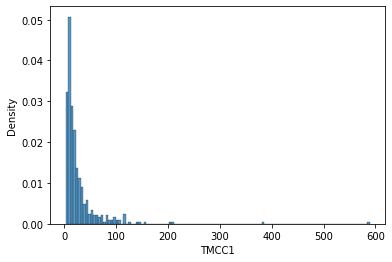

In [ ]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

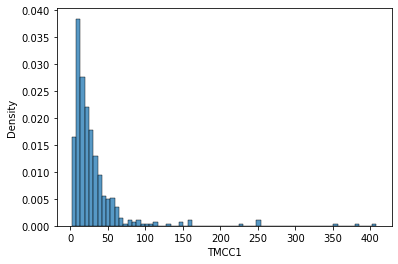

In [ ]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

In [ ]:
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = [np.mean(np.random.choice(expressions, sample_size)) for i in range(n_samples)]
    return mean_expressions

In [ ]:
# because readability counts, right????
b = b_cells_expression_data[example_gene]
nk = nk_cells_expression_data[example_gene]

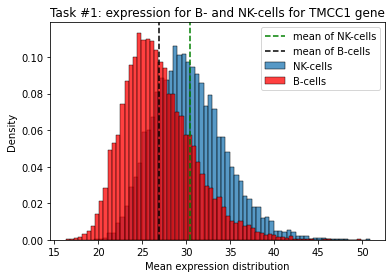

In [ ]:
clt_nk = demonstrate_clt(nk, 100, 10000)
clt_b = demonstrate_clt(b, 100, 10000)

plt.title(f'Task #1: expression for B- and NK-cells for {example_gene} gene')
sns.histplot(clt_nk, stat="density", label='NK-cells')
plt.axvline(np.mean(clt_nk), c='g', ls='--', label='mean of NK-cells')
sns.histplot(clt_b, stat="density", color='r', label='B-cells')
plt.axvline(np.mean(clt_b), c='k', ls='--', label='mean of B-cells')
plt.xlabel('Mean expression distribution')
plt.legend()
plt.show()

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

p(-1.96 < $\dfrac{x - \mu}{\sigma / \sqrt n}$ < 1.96) $\approx$ 0.95

In [ ]:
left_nk = -1.96 * np.std(nk) / (len(nk)**0.5) 
right_nk = 1.96 * np.std(nk) / (len(nk)**0.5)

nk_conf_int = sorted([i for i in nk if left_nk < (i - np.mean(nk)) < right_nk])
print(f'Expression of {example_gene} for NK-cells has {nk_conf_int[0], nk_conf_int[-1]} 95% confidence interval')

Expression of TMCC1 for NK-cells has (26.938063, 33.801617) 95% confidence interval


In [ ]:
left_b = -1.96 * np.std(b) / (len(b)**0.5) 
right_b = 1.96 * np.std(b) / (len(b)**0.5)

b_conf_int = sorted([i for i in b if left_b < (i - np.mean(b)) < right_b])
print(f'Expression of {example_gene} for B-cells has {b_conf_int[0], b_conf_int[-1]} 95% confidence interval')

Expression of TMCC1 for B-cells has (23.49602, 30.344753) 95% confidence interval


## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [12]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [ ]:
# B клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(23.420272072079296, 30.53767158632071)

In [ ]:
# NK клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(26.84610468807562, 34.01653451272438)

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [ ]:
def check_intervals_intersect(first_ci, second_ci):   
    are_intersect = (first_ci[0] < second_ci[1]) & (second_ci[0] < first_ci[1])
    return are_intersect

Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

In [ ]:
ci_test_results = []

for i in expression_data.columns[:-1]:
  b_data = b_cells_expression_data[i]
  nk_data = nk_cells_expression_data[i]
  b_ci = st.t.interval(alpha=0.95, df=len(b_data) - 1, 
                       loc=np.mean(b_data), scale=st.sem(b_data))
  nk_ci = st.t.interval(alpha=0.95, df=len(nk_data) - 1, 
                        loc=np.mean(nk_data), scale=st.sem(nk_data))
  ci_test_results.append(check_intervals_intersect(b_ci, nk_ci))

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [ ]:
def check_dge_with_ci(first_table, second_table):
    ci_test_results = []

    for i in first_table.columns:
      one_dge, two_dge = first_table[i], second_table[i]
      one_ci = st.t.interval(alpha=0.95, df=len(one_dge) - 1, 
                             loc=np.mean(one_dge), scale=st.sem(one_dge))
      two_ci = st.t.interval(alpha=0.95, df=len(two_dge) - 1, 
                             loc=np.mean(two_dge), scale=st.sem(two_dge))
      ci_test_results.append(check_intervals_intersect(one_ci, two_ci))

    return ci_test_results

In [ ]:
stat_check = check_dge_with_ci(b_cells_expression_data.iloc[:, :-1], 
                               nk_cells_expression_data.iloc[:, :-1])

In [ ]:
# let's check if the two things are truely identical
ci_test_results == stat_check

True

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [13]:
from statsmodels.stats.weightstats import ztest

In [ ]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-1.3427434041885127, 0.17935507499860204)

In [ ]:
print(f'The expression of {example_gene} gene in B- and NK-cells is {("not", "")[int(ztest(b, nk)[1] < 0.05)]} different')

The expression of TMCC1 gene in B- and NK-cells is not different


Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

In [ ]:
def check_dge_with_ztest(first_table, second_table, alpha=0.05):
    z_test_results = []

    for i in first_table.columns:
      res = ztest(first_table[i], second_table[i])[1] < 0.05
      z_test_results.append(res)

    return z_test_results

## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [ ]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.0040,-10.0
1,False,True,0.0100,10.0
2,True,True,0.0001,0.5


In [ ]:
# Сохраним таблицу в .csv файл
results.to_csv("path_to_your_awesome_results.csv")

### my programme

In [ ]:
def my_programme(first_cell_type_expressions_path, 
                 second_cell_type_expressions_path,
                 save_results_table):
  # read the files
  one = pd.read_csv(first_cell_type_expressions_path, index_col=0)
  two = pd.read_csv(second_cell_type_expressions_path, index_col=0)

  # create a storage for the outputs
  ci_test_results = []
  z_test_results, z_test_p_values = [], []
  mean_diff = []
  naming = []

  # check the compatibility
  if set(one.columns) != set(two.columns):
    print("""The two datasets have unequal sets of columns. 
    The analysis will be continued with the overlapping ones.""")
  
  # get only those genes that are in both datasets
  overlap = set(one.columns) & set(two.columns)

  for i in overlap:
    # are the confidence intervals of those intersecting?
    one_ci = st.t.interval(alpha=0.95, df=len(one[i]) - 1, 
                           loc=np.mean(one[i]), scale=st.sem(one[i]))
    two_ci = st.t.interval(alpha=0.95, df=len(two[i]) - 1, 
                           loc=np.mean(two[i]), scale=st.sem(two[i]))
    intersect = (one_ci[0] < two_ci[1]) & (two_ci[0] < one_ci[1])
    ci_test_results.append(intersect)
    naming.append(i)

    # could those expressions based on z-test be considered different?
    z_res = ztest(one[i], two[i])
    z_test_results.append(z_res[1] < 0.05)
    z_test_p_values.append(z_res[1])

    # what is the difference between two means?
    mean_different = np.mean(one[i]) - np.mean(two[i])
    mean_diff.append(mean_different)

  # transfer all results to the table and save it
  results = {'name': naming,
             "ci_test_results": ci_test_results,
             "z_test_results": z_test_results,
             "z_test_p_values": z_test_p_values,
             "mean_diff": mean_diff}
  
  results = pd.DataFrame(results)
  results.to_csv(f"{save_results_table}.csv", index=False)

In [1]:
print('Hi, welcome to the differential gene expression comparer!\n')

print("""WARNING! 
This works only with TWO datasets! 
Use it to compare gene expressions for TWO groups. 
It's better to contain similar sets of genes...\n""")

path_one = input('Please, indicate the path to ur first dataset, including the file name: ')
path_two = input('Please, indicate the path to ur second dataset, including the file name: ')
output_name = input('Please, indicate the desirable name for the output without .csv: ')

print('''\nBE AWARE: there is an additional first column with gene names,
because the scrip is using union of sets, so the order is messed up...''')

my_programme(path_one, path_two, output_name)

print('\nThe programme has run, pls check the output. Bye bye')

Hi, welcome to the differential gene expression comparer!

WARNING! 
This works only with TWO datasets! 
Use it to compare gene expressions for TWO groups. 
It's better to contain similar sets of genes...

Please, indicate the path to ur first dataset, including the file name: b.csv
Please, indicate the path to ur second dataset, including the file name: nk.csv
Please, indicate the desirable name for the output without .csv: output_name

BE AWARE: there is an additional first column with gene names,
because the scrip is using union of sets, so the order is messed up...

The programme has run, pls check the output. Bye bye


## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)

We have discussed how to get a picture for the 5th task of this homework...

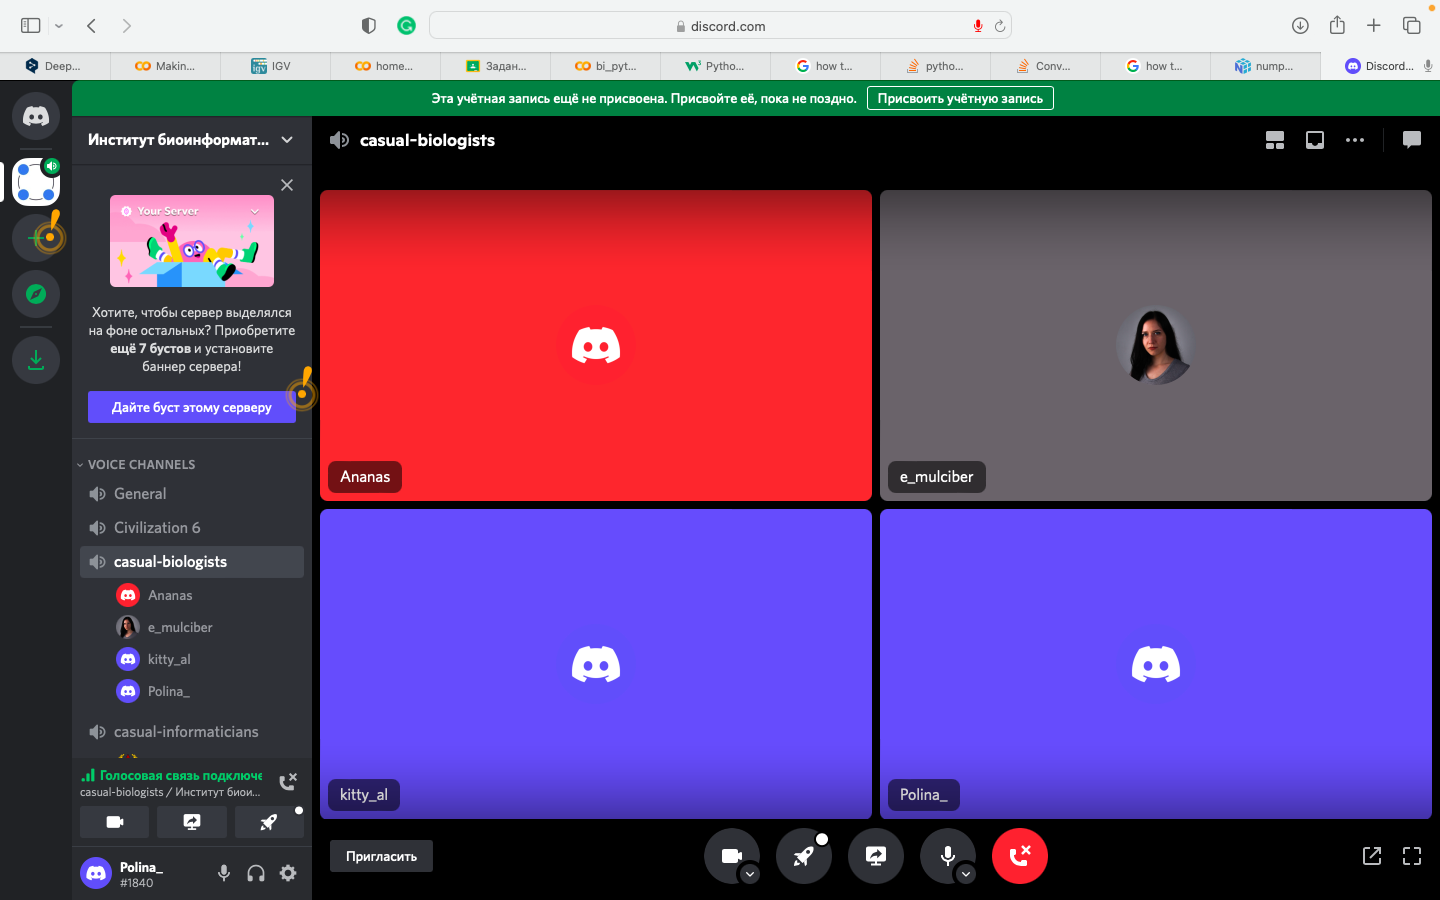